# Jorgen's March Madness Bracket Simulator:


Things that should be configured by run:

*   Sigma: range of standard deviation
*   Runs: how many times the bracket is simulated
*   Alpha: how often upsets should happen





In [1]:
from google.colab import auth
from google.colab import data_table
from google.colab import drive
auth.authenticate_user()
import gspread
from google.auth import default
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import urllib.request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from dataclasses import dataclass
from matplotlib.pyplot import figure
creds, _ = default()
gc = gspread.authorize(creds)

drive.mount('/content/drive')

#here are the importantant variables:
bracket_simulations = 1000
sigma = 0.09 #higher number more upsets
# alpha = 0.3  #higher number more upsets

Mounted at /content/drive


In [2]:
worksheet = gc.open('BartFile').sheet1
rows = worksheet.get_all_values()
teamStats = pd.DataFrame.from_records(rows)
teamStats["Team_ID"] = " "
teamStats.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,Team_ID
0,Team,Adj OE,Adj DE,Trank,Record,Wins,Games,eFG,eFG D.,FT Rate,...,PASE,Talent,,FT%,Op. FT%,PPP Off.,PPP Def.,Elite SOS,Team,
1,Gonzaga,120.307,89.886,0.966,28–4,28,32,58.7,43.1,30.6,...,-1.35,86.976,,71.5,69.9,1.181,0.897,26.117,Gonzaga,
2,Houston,116.537,88.5,0.959,32–6,32,38,53.1,43.3,29,...,1.886,51.79,,66.7,71.7,1.139,0.895,25.58,Houston,
3,Kansas,119.794,91.268,0.958,34–6,34,40,53.8,45.8,32.3,...,2.65,77.998,,71.7,71.9,1.116,0.959,36.766,Kansas,
4,Texas Tech,110.513,85.408,0.951,27–10,27,37,52.6,45.8,35.1,...,0.136,22.03,,69.8,69,1.06,0.892,36.023,Texas Tech,


I have added a corresponding teamID for every team in the list because there are too many spellings for each school

In [3]:
gc = gspread.authorize(creds)
worksheet = gc.open('SchoolID').sheet1
rows = worksheet.get_all_values()

import pandas as pd
schoolID = pd.DataFrame.from_records(rows)
schoolID.head()

schoolID_dict = dict(zip(schoolID[0], schoolID[1]))
schoolID_dict["team"] = -1

print(schoolID_dict['gonzaga'])

for index, row in teamStats.iterrows():
    
    row['Team_ID'] = schoolID_dict[row[0].lower()]

teamStats

1211


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,Team_ID
0,Team,Adj OE,Adj DE,Trank,Record,Wins,Games,eFG,eFG D.,FT Rate,...,PASE,Talent,,FT%,Op. FT%,PPP Off.,PPP Def.,Elite SOS,Team,-1
1,Gonzaga,120.307,89.886,0.966,28–4,28,32,58.7,43.1,30.6,...,-1.35,86.976,,71.5,69.9,1.181,0.897,26.117,Gonzaga,1211
2,Houston,116.537,88.5,0.959,32–6,32,38,53.1,43.3,29,...,1.886,51.79,,66.7,71.7,1.139,0.895,25.58,Houston,1222
3,Kansas,119.794,91.268,0.958,34–6,34,40,53.8,45.8,32.3,...,2.65,77.998,,71.7,71.9,1.116,0.959,36.766,Kansas,1242
4,Texas Tech,110.513,85.408,0.951,27–10,27,37,52.6,45.8,35.1,...,0.136,22.03,,69.8,69,1.06,0.892,36.023,Texas Tech,1403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,Columbia,91.501,114.203,0.073,3–22,3,25,48.5,54.8,26.1,...,0,2.637,,62.7,73.6,0.937,1.119,9.411,Columbia,1162
355,Central Connecticut,90.015,112.541,0.071,8–24,8,32,46,52.9,29.1,...,0,0.2,,70.8,71,0.922,1.076,10.27,Central Connecticut,1148
356,Delaware St.,86.506,110.117,0.059,0–25,0,25,45,51.1,32.4,...,0,8.782,,67.4,70.6,0.856,1.071,7.753,Delaware St.,1175
357,Eastern Illinois,82.963,108.39,0.044,3–26,3,29,44.2,53.4,31.2,...,0,0.328,,63.8,68.1,0.818,1.076,12.81,Eastern Illinois,1183


In [4]:
teamStats.columns.tolist()
teamStats = teamStats[[0,3,'Team_ID']]
teamStats

,0,3,Team_ID
0,Team,Trank,-1
1,Gonzaga,0.966,1211
2,Houston,0.959,1222
3,Kansas,0.958,1242
4,Texas Tech,0.951,1403
...,...,...,...
354,Columbia,0.073,1162
355,Central Connecticut,0.071,1148
356,Delaware St.,0.059,1175
357,Eastern Illinois,0.044,1183


In [5]:
gc = gspread.authorize(creds)

worksheet = gc.open('2022_March_Madness_Teams').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

import pandas as pd
allTeams = pd.DataFrame.from_records(rows)
print(allTeams)

       0                 1                   2               3               4
0   Seed              West             Midwest           South            East
1      1           Gonzaga              Kansas         Arizona          Baylor
2     16     Georgia State      Texas Southern    Wright State   Norfolk State
3      8       Boise State     San Diego State      Seton Hall  North Carolina
4      9           Memphis           Creighton             TCU       Marquette
5      5       Connecticut                Iowa         Houston    Saint Mary's
6     12  New Mexico State            Richmond             UAB         Indiana
7      4          Arkansas          Providence        Illinois            UCLA
8     13           Vermont  South Dakota State     Chattanooga           Akron
9      6           Alabama                 LSU  Colorado State           Texas
10    11        Notre Dame          Iowa State        Michigan   Virginia Tech
11     3        Texas Tech           Wisconsin      

In [6]:
teams2DList = allTeams[[1,2,3,4]].values.tolist()
teamsList = sum([list(map(lambda s: schoolID_dict[s.lower()], team)) for team in teams2DList[1:]], [])
#for i in range(1,len(teams2DList)):
#  for j in teams2DList[i]:
#    teamsList.append(schoolID_dict[j.lower()])
# print(teamsList)
tournamentStats = teamStats[teamStats['Team_ID'].isin(teamsList)]
# print("number of teams: ",len(tournamentStats))
# print(teamsList)
tournamentStats

,0,3,Team_ID
1,Gonzaga,0.966,1211
2,Houston,0.959,1222
3,Kansas,0.958,1242
4,Texas Tech,0.951,1403
5,Baylor,0.949,1124
...,...,...,...
155,Montana St.,0.531,1286
181,Cal St. Fullerton,0.467,1168
186,Wright St.,0.461,1460
197,Texas Southern,0.436,1411


This scrapes ESPN who picked WHOm for data:

In [7]:
fp = urllib.request.urlopen("https://fantasy.espn.com/tournament-challenge-bracket/2022/en/whopickedwhom")
mybytes = fp.read()

html_doc = mybytes.decode("utf8")
fp.close()

soup = BeautifulSoup(html_doc, 'html.parser')
# soup

<!DOCTYPE html>
<html class="loggedOut">
<head>
<title>Men's Tournament Challenge - ESPN - Who Picked Whom</title>
<link href="https://g.espncdn.com/s/tcmen/15/openGraph.jpg" rel="image_src"/>
<!-- 8298ad286750 -->
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible">
<meta content="width=device-width, initial-scale=1.0,maximum-scale=1.0, user-scalable=no, viewport-fit=cover" name="viewport">
<script src="https://nexus.ensighten.com/TWDC-DTCI/prod/Bootstrap.js" type="text/javascript"></script><link href="https://fantasy.espn.com/tournament-challenge-bracket/2022/en/whopickedwhom" rel="canonical"/><meta content="116656161708917" property="fb:app_id"><meta content="https://fantasy.espn.com/tournament-challenge-bracket/2022/en/?redirect=tcmen%3A%2F%2Fx-callback-url&amp;ex_cid=tcmen2022_facebook&amp;gO=true&amp;sscb=100&amp;

In [ ]:
mydivs = soup.find_all("span", {"class": "percentage"})
for i in range(len(mydivs)):
  mydivs[i] = mydivs[i].text

perArray = [] # array of percentages corresponding to teams
perBuilder = []
for i in range(len(mydivs)):
  if len(perBuilder) == 6:
    perArray.append(perBuilder)
    perBuilder = []
  perBuilder.append(mydivs[i])
perArray.append(perBuilder)

mydivs = soup.find_all("span", {"class": "teamName"})
for i in range(len(mydivs)):
  mydivs[i] = mydivs[i].text

perNameArray = [] # array of teams corresponding to percentages
perBuilder = []
for i in range(len(mydivs)):
  if len(perBuilder) == 6:
    perNameArray.append(perBuilder)
    perBuilder = []
  perBuilder.append(schoolID_dict[mydivs[i].lower()])
perNameArray.append(perBuilder)

teamsList # a list of all teams
percentageFrame = pd.DataFrame(teamsList)
percentageFrame['R32'] = ""; percentageFrame['S16'] = ""; percentageFrame['E8'] = ""; percentageFrame['F4'] = ""; percentageFrame['NCG'] = ""; percentageFrame['R64'] = ""

# make a dictionary mapping the ID to list of positions| example: D["1112"] = ["R11", "12", ....]
id_pos = {}
for i in range(len(perArray)):
  for j in range(len(perArray[i])):
    cur_name = perNameArray[i][j]
    if cur_name not in id_pos: id_pos[cur_name] = []
    id_pos[cur_name].append(float(perArray[i][j][:-1]))
    id_pos[cur_name].sort()

array_2d_to_frame = []
for i in range(len(teamsList)):
  find_team_id = id_pos[teamsList[i]]
  array_2d_to_frame.append([teamsList[i]])
  for j in range(len(find_team_id)):
    array_2d_to_frame[i].append(find_team_id[j])
percentageFrame = pd.DataFrame.from_records(array_2d_to_frame)
percentageFrame.columns =['Team_ID','NCG','F4','E8', 'S16', 'R32', 'R64']

percentageFrame['Sum'] = (percentageFrame.NCG*320 + percentageFrame.F4*160 + percentageFrame.E8*80 + percentageFrame.S16*40 + percentageFrame.R32*20 + percentageFrame.R64*10)/100
print(percentageFrame)

# create a dataframe to merge
id_mapped_to_sum_frame = percentageFrame.drop(columns=['NCG', 'F4','E8','S16','R32','R64'])
id_mapped_to_sum_frame

   Team_ID   NCG    F4    E8   S16   R32   R64     Sum
0     1211  27.1  41.7  58.4  78.7  90.3  96.5  259.35
1     1242   8.3  19.3  42.7  64.9  87.4  96.6  144.70
2     1112  13.4  29.8  43.3  67.2  88.9  96.8  179.54
3     1124   5.4  10.5  28.5  53.7  78.6  96.2  103.70
4     1209   0.2   0.3   0.5   0.9   1.6   3.5    2.55
..     ...   ...   ...   ...   ...   ...   ...     ...
59    1246   6.9  13.0  31.9  54.6  83.2  95.6  116.44
60    1168   0.1   0.1   0.3   0.9   1.7   4.4    1.86
61    1240   0.1   0.1   0.3   0.9   1.9   5.0    1.96
62    1174   0.1   0.1   0.3   0.9   2.0   5.1    1.99
63    1389   0.1   0.1   0.3   0.9   1.9   4.4    1.90

[64 rows x 8 columns]


,Team_ID,Sum
0,1211,259.35
1,1242,144.70
2,1112,179.54
3,1124,103.70
4,1209,2.55
...,...,...
59,1246,116.44
60,1168,1.86
61,1240,1.96
62,1174,1.99


In [ ]:
id_to_sum_dict = id_mapped_to_sum_frame.set_index('Team_ID').to_dict()['Sum']
tournamentStats = tournamentStats.merge(id_mapped_to_sum_frame, left_on='Team_ID', right_on='Team_ID')
tournamentStats

,0,3,Team_ID,Sum
0,Gonzaga,0.966,1211,259.35
1,Houston,0.959,1222,38.80
2,Kansas,0.958,1242,144.70
3,Texas Tech,0.951,1403,60.10
4,Baylor,0.949,1124,103.70
...,...,...,...,...
59,Montana St.,0.531,1286,2.32
60,Cal St. Fullerton,0.467,1168,1.86
61,Wright St.,0.461,1460,1.98
62,Texas Southern,0.436,1411,2.00


In [ ]:
#@title Below is the QuantifyMatchupsChallenge, but it is colapse for the sake of brevitry
def rounds_to_points(rounds):
  return pow(2,(rounds-1)) * 10 - 10
  # if(rounds == 7):
  #   return 1
  # return 0

@dataclass
class QuantifyMatchupsChallenge:
  """A class for running brackets with no randomness off of MMELO exclusively"""
  all_teams: pd.DataFrame
  tournament_stats: pd.DataFrame
  schoolID_dict: dict
  sigma: int = 0.21
  avg_placement_dict: dict = None
  west: list = None
  east: list = None
  midwest: list = None
  south: list = None
  random_nums: list = None

  def matchup(self, team1, team2, round = 'n/a'):
    team1ID = schoolID_dict[team1.lower()]
    team2ID = schoolID_dict[team2.lower()]

    team1Row = self.tournament_stats.loc[self.tournament_stats['Team_ID'] == team1ID].iloc[0].values
    team2Row = self.tournament_stats.loc[self.tournament_stats['Team_ID'] == team2ID].iloc[0].values
    
    # mu = 0 # mean and standard deviation  //.062 too low
    # normal_rand = 0
    # normal_rand = np.random.normal(mu, self.sigma, 1)[0]

    normal_rand = self.random_nums.pop() 
    if(float([1]) + normal_rand > float(team2Row[1])):
      self.avg_placement_dict[team2ID] = self.avg_placement_dict[team2ID] + rounds_to_points(round)
      return team1
   
    self.avg_placement_dict[team1ID] = self.avg_placement_dict[team1ID] + rounds_to_points(round)
    return team2

  def runRound(self, cur_matchup, round = 'n/a'):
    # runs one round of the tournament:
    # teamsList: the list of teams in seed order (it is assumed to be longer than one team)
    # tournamentStats: the dataframe created above
    winners = []
    for i in range(len(cur_matchup)//2):
      winners.append(self.matchup(cur_matchup[i*2], cur_matchup[i*2+1], round))
    return winners

  def runRegion(self, cur_matchup, round = 1):
    while(len(cur_matchup)) > 1:
      cur_matchup = self.runRound(cur_matchup, round)
      round = round + 1
    return cur_matchup

  def runBracket(self):
    final_four = []
    winner = self.runRegion(self.west)[0]
    final_four.append(winner)
    winner = self.runRegion(self.east)[0]
    final_four.append(winner)
    winner = self.runRegion(self.midwest)[0]
    final_four.append(winner)
    winner = self.runRegion(self.south)[0]
    final_four.append(winner)

    winner = self.runRegion(final_four, 5)[0]
    winnerID = schoolID_dict[winner.lower()]
    self.avg_placement_dict[winnerID] = self.avg_placement_dict[winnerID] + rounds_to_points(7)

  def runBracketTimes(self, n):
    for i in range(n):
      self.runBracket()

    for key in self.avg_placement_dict:
      self.avg_placement_dict[key] = self.avg_placement_dict[key]/n

    print(n, "runs completed")

  def prepare_sim(self):
    self.random_nums = np.random.normal(0., self.sigma, bracket_simulations*63+10).tolist()
    west = self.all_teams[1].to_numpy()
    west = west[1:]
    east = self.all_teams[4].to_numpy()
    east = east[1:]
    midwest = self.all_teams[2].to_numpy()
    midwest = midwest[1:]
    south = self.all_teams[3].to_numpy()
    south = south[1:]
    all_teams_list = np.concatenate((west, east, south, midwest))

    self.west = (self.all_teams[1].to_numpy()[1:]).tolist()
    self.east = self.all_teams[4].to_numpy()[1:].tolist()
    self.midwest = self.all_teams[2].to_numpy()[1:].tolist()
    self.south = self.all_teams[3].to_numpy()[1:].tolist()

    self.avg_placement_dict = {}
    for i in range(len(all_teams_list)):
      all_teams_list[i] = schoolID_dict[all_teams_list[i].lower()]
      self.avg_placement_dict[all_teams_list[i]] = 0

In [ ]:
findMatchups = QuantifyMatchupsChallenge(allTeams, tournamentStats, schoolID_dict, sigma)
findMatchups.prepare_sim()
findMatchups.runBracketTimes(bracket_simulations)
matchup_adj_dict = findMatchups.avg_placement_dict
matchup_adj_pd = pd.DataFrame(sorted(list(matchup_adj_dict.items()), key=lambda x:-x[1]), columns=['ID', 'Matchup_points'])
data_table.DataTable(matchup_adj_pd, num_rows_per_page=10)

1000 runs completed


,ID,Matchup_points
0,1242,175.04
1,1211,164.36
2,1222,128.18
3,1403,118.32
4,1181,110.28
...,...,...
59,1460,0.00
60,1255,0.00
61,1174,0.00
62,1411,0.00


In [ ]:
tournamentStats = tournamentStats.merge(matchup_adj_pd, left_on='Team_ID', right_on='ID').drop('ID', axis=1)


In [ ]:
alpha = 0.2  #higher number more upsets
# phi = 0.2 #higher more

tournamentStats['Predict_ratio'] = -1 * tournamentStats['Sum'] + tournamentStats['Matchup_points']
tournamentStats['Jorgen_ELO'] = tournamentStats['Predict_ratio']*alpha + tournamentStats['Matchup_points']
tournamentStats.sort_values('Predict_ratio', inplace=True, ascending=False)
tournamentStats.head()

,0,3,Team_ID,Sum,Matchup_points,Predict_ratio,Jorgen_ELO
1,Houston,0.959,1222,38.80,132.93,94.13,151.756
3,Texas Tech,0.951,1403,60.10,112.74,52.64,123.268
6,Tennessee,0.944,1397,86.13,119.66,33.53,126.366
12,Iowa,0.927,1234,50.58,80.09,29.51,85.992
2,Kansas,0.958,1242,144.70,168.42,23.72,173.164


Here will be a plot of the MMELO graph of all teams

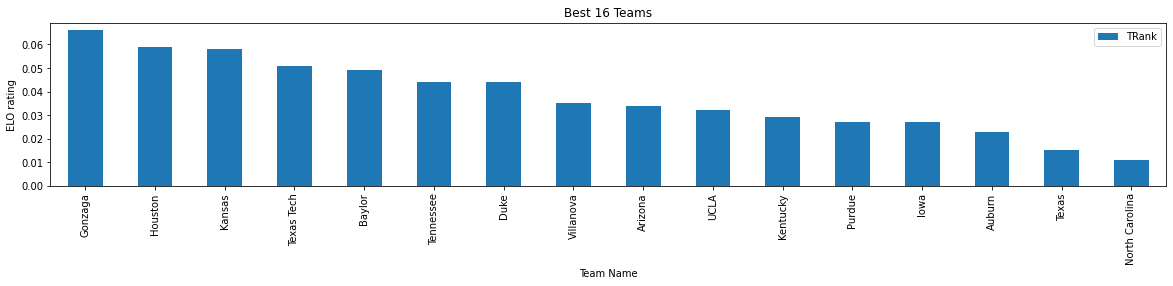

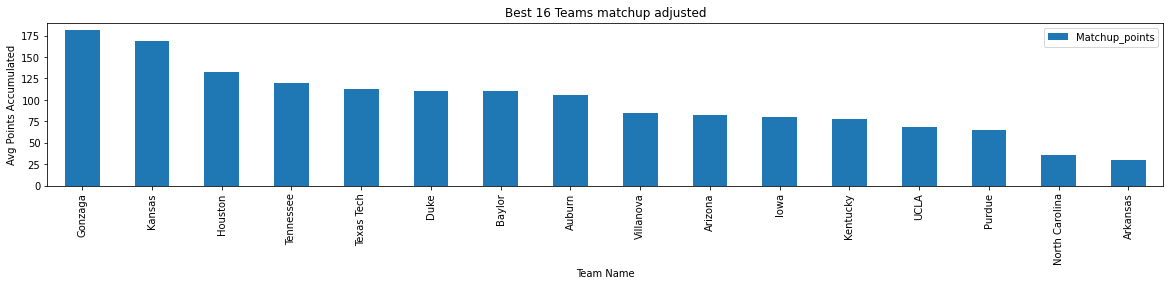

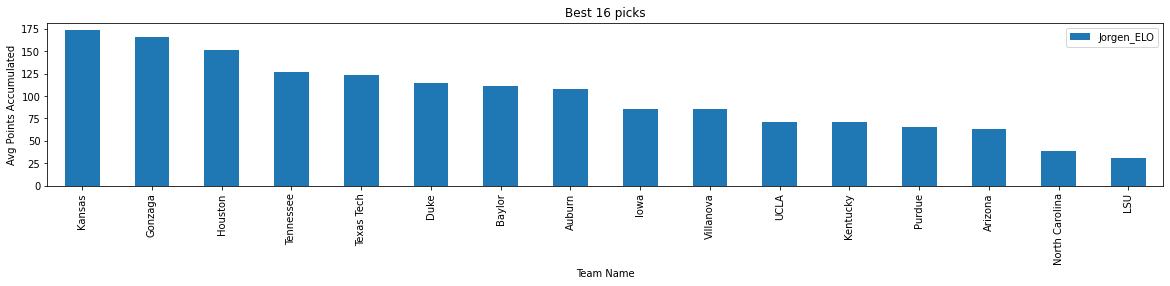

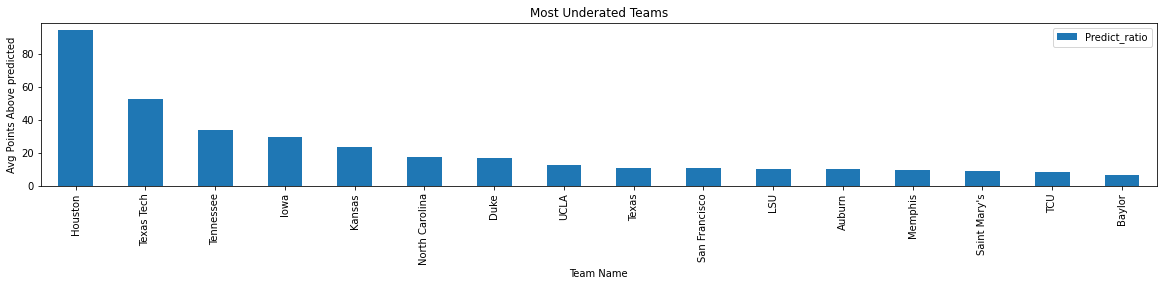

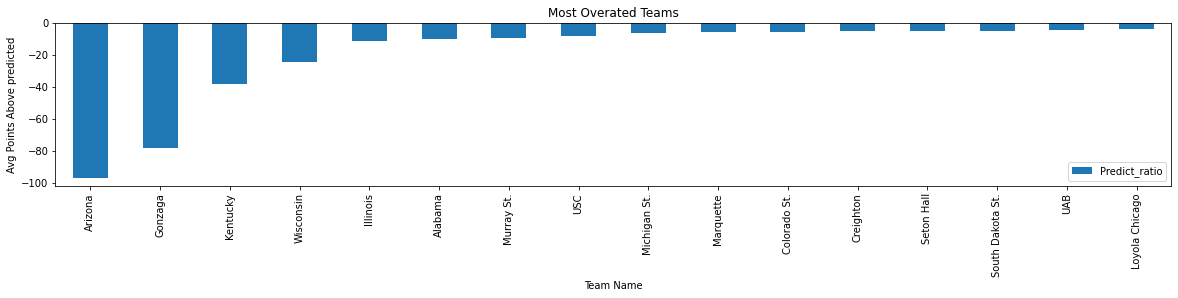

In [ ]:
#plot 
mmelo_frame = tournamentStats
mmelo_frame = mmelo_frame.drop(columns=["Predict_ratio", 'Team_ID','Matchup_points','Jorgen_ELO'])
mmelo_frame['TRank'] = mmelo_frame[3].astype(float) - 0.9
top_10_teams = mmelo_frame.sort_values(3, ascending=False).head(16)
top_10_teams.plot(x=0, y=["TRank"], kind="bar")

plt.title("Best 16 Teams")
plt.ylabel("ELO rating")
plt.xlabel("Team Name")
plt.show()


#plot2
mmelo_frame = tournamentStats
mmelo_frame = mmelo_frame.drop(columns=[3, 'Team_ID','Sum'])
top_10_teams = mmelo_frame.sort_values("Matchup_points", ascending=False).head(16)
top_10_teams.plot(x=0, y=["Matchup_points"], kind="bar")


plt.title("Best 16 Teams matchup adjusted")
plt.ylabel("Avg Points Accumulated")
plt.xlabel("Team Name")
plt.show()


#plot2
mmelo_frame = tournamentStats
mmelo_frame = mmelo_frame.drop(columns=[3, 'Team_ID','Sum'])
top_10_teams = mmelo_frame.sort_values("Jorgen_ELO", ascending=False).head(16)
top_10_teams.plot(x=0, y=["Jorgen_ELO"], kind="bar")


plt.title("Best 16 picks")
plt.ylabel("Avg Points Accumulated")
plt.xlabel("Team Name")
plt.show()


#plot 3
mmelo_frame = tournamentStats
mmelo_frame = mmelo_frame.drop(columns=[3, 'Team_ID','Matchup_points','Jorgen_ELO'])
top_10_teams = mmelo_frame.sort_values("Predict_ratio", ascending=False).head(16)
top_10_teams.plot(x=0, y=["Predict_ratio"], kind="bar")

plt.title("Most Underated Teams")
plt.ylabel("Avg Points Above predicted")
plt.xlabel("Team Name")
plt.show()

#plot 4
mmelo_frame = tournamentStats
mmelo_frame = mmelo_frame.drop(columns=[3, 'Team_ID','Matchup_points','Jorgen_ELO'])
top_10_teams = mmelo_frame.sort_values("Predict_ratio", ascending=True).head(16)
top_10_teams.plot(x=0, y=["Predict_ratio"], kind="bar")

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams["figure.figsize"] = (20,3)
plt.title("Most Overated Teams")
plt.ylabel("Avg Points Above predicted")
plt.xlabel("Team Name")
plt.show()

In [ ]:
#@title Below is the normalBracket dataclass, but it is colapse for the sake of brevitry
@dataclass
class normalBracket:
  """A class for running brackets with no randomness off of MMELO exclusively"""
  all_teams: pd.DataFrame
  tournament_stats: pd.DataFrame
  schoolID_dict: dict
  str_print: str = ""

  def matchup(self, team1, team2):
    team1ID = schoolID_dict[team1.lower()]
    team2ID = schoolID_dict[team2.lower()]
    # print (team1," vs ", team2)

    team1Row = self.tournament_stats.loc[self.tournament_stats['Team_ID'] == team1ID].to_numpy()[0]
    team2Row = self.tournament_stats.loc[self.tournament_stats['Team_ID'] == team2ID].to_numpy()[0]
    # print(team1Row, "wins vs", team2Row)
    
    if(team1Row[6] > team2Row[6]):
      # print(team1,team1Row[4], "wins vs", team2, team2Row[4])
      self.str_print += (f"{team1} ({team1Row[6]}) wins vs {team2} ({team2Row[6]})\n")
      return team1
    else:
      self.str_print += (f"{team2} ({team2Row[6]}) wins vs {team1} ({team1Row[6]})\n")
      return team2

  def runRound(self, cur_matchup):
    # runs one round of the tournament:
    # teamsList: the list of teams in seed order (it is assumed to be longer than one team)
    # tournamentStats: the dataframe created above
    winners = []
    for i in range(len(cur_matchup)//2):
      winners.append(self.matchup(cur_matchup[i*2], cur_matchup[i*2+1]))
    return winners

  def runRegion(self, cur_matchup):
    # print(cur_matchup)
    while(len(cur_matchup)) > 1:
      cur_matchup = self.runRound(cur_matchup)
    return cur_matchup

  def runBracket(self):
    final_four = []
    west = self.all_teams[1].to_numpy()
    west = west[1:]
    winner = self.runRegion(west.tolist())[0]
    final_four.append(winner)
    self.str_print += (f'{winner} has won the west\n\n')

    east = self.all_teams[4].to_numpy()
    east = east[1:]
    winner = self.runRegion(east.tolist())[0]
    final_four.append(winner)
    self.str_print += (f'{winner} has won the east\n\n')

    midwest = self.all_teams[2].to_numpy()
    midwest = midwest[1:]
    winner = self.runRegion(midwest.tolist())[0]
    final_four.append(winner)
    self.str_print += (f'{winner} has won the midwest\n\n')

    south = self.all_teams[3].to_numpy()
    south = south[1:]
    winner = self.runRegion(south.tolist())[0]
    final_four.append(winner)
    self.str_print += (f'{winner} has won the south\n\n')

    winner = self.runRegion(final_four)[0]
    self.str_print +=  (f'{winner} has won the tournament')
    return self.str_print
    # return "completed"

# make a class have all data shared in the class
eloBracket = normalBracket(allTeams, tournamentStats, schoolID_dict)
r1 = eloBracket.runBracket()
print(r1)

Gonzaga (165.42600000000002) wins vs Georgia State (-0.51)
Memphis (21.331999999999997) wins vs Boise State (2.5279999999999996)
Connecticut (23.906) wins vs New Mexico State (0.5340000000000001)
Arkansas (30.644) wins vs Vermont (1.9499999999999997)
Notre Dame (6.486) wins vs Alabama (6.1579999999999995)
Texas Tech (123.268) wins vs Montana State (-0.46399999999999997)
Michigan State (6.648000000000001) wins vs Davidson (4.9559999999999995)
Duke (114.04400000000001) wins vs CS Fullerton (-0.37200000000000005)
Gonzaga (165.42600000000002) wins vs Memphis (21.331999999999997)
Arkansas (30.644) wins vs Connecticut (23.906)
Texas Tech (123.268) wins vs Notre Dame (6.486)
Duke (114.04400000000001) wins vs Michigan State (6.648000000000001)
Gonzaga (165.42600000000002) wins vs Arkansas (30.644)
Texas Tech (123.268) wins vs Duke (114.04400000000001)
Gonzaga (165.42600000000002) wins vs Texas Tech (123.268)
Gonzaga has won the west

Baylor (111.38) wins vs Norfolk State (-0.40800000000000003)

In [ ]:
tournamentStats = tournamentStats.sort_values("Matchup_points", ascending=False)
with open('/content/drive/My Drive/MarchMadness/Results.txt', 'w') as f:
  f.write(f'Simulations: {bracket_simulations}, Sigma: {sigma}, Alpha: {alpha} \n')
  f.write('March Madness 2022 Simulation \n')
  f.write(tournamentStats.to_string())
  f.write("\n\n")
  f.write(r1)
# !cat /content/drive/My Drive/MarchMadness/Results.pdf